In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import sys
print(sys.executable)
from sympy import init_printing
init_printing()

/Users/johncmcc/.pyenv/versions/3.8.12/bin/python


# Linear Algebra 18.06

## Lecture 1: The Geometry of Linear Equations

### Overview:

- Systems of linear equations
   - The Fundamental Problem of Linear Algebra: we have `n` equations and `n` unknowns.
- The Row Picture
- The Column picture
- Matrix Form

### Systems of linear equations

#### Example 1

2 equations with 2 `unknowns` are given below:<br>

$$ \begin{align} {2x}-{y} &= {3} 
\\ -{x} + {2y} &= {0} \end{align} $$

We want to create a Matrix of co-efficients to express this equation in the form `Ax = b`

$$ \begin{align}
{\begin{bmatrix}2 & -1 \\ -1 & 2\end{bmatrix}}
{\begin{bmatrix}x \\ y \end{bmatrix}} 
&= {\begin{bmatrix} 0 \\ 3 \end{bmatrix}}\\
{A} \quad \quad {x}\;\   &= {b}\end{align}$$

We can see then that a matrix `A` is simply a rectangular array of numbers.

Stepping back to see the bigger picture of a system of numbers we can view the system of equations in terms of 2 pictures:
- The Row Picture
- The Column Picture

These pictures can tell us a lot about our system of linear equations.

### The Row Picture

Plotting the `Row Pic` is a matter of plotting all points that solve the the equations in our system.<br>
Below is a 2 Dimensional graph showing the lines of `2x - y = 0`, and `-x + 2y = 3`.<br>

![title](LA_images/rowPic.png)<br>

In linear equations all lines are straight and all points on the line solve one of the row equations. Both equations are solved at the point where they meet `x = 1, y = 2`.<br>
The row picture plots the co-efficients of our system of equations giving us a simple look at our problem.




### The Column Picture

Now we look at the `Column pic`.<br>The cols of a matrix can be viewed as a scalar `x` applied to `col.1` and a scalar `y` applied to `col.2`.

$$ \begin{align} 
x 
\begin{bmatrix} 2 \\ -1 \end{bmatrix}
+y
\begin{bmatrix} -1 \\ 2 \end{bmatrix}
&= 
\begin{bmatrix} 0 \\ 3 \end{bmatrix}
\end{align} $$

We think of this as a combination of the right amount of `col.1` plus the right amount of `col.2` to
get `b`.<br>
This is called a <b>linear combination</b> of the cols of `A`. Take a multiple of `col.1` and a multiple
of `col.2` and add together.

Now we can look at the geometry of the column pic.

![title](LA_images/colPic.png)<br>

In the col pic we draw our col vectors, then complete the parallelogram to find the values for `x` and `y` so that we finish on the answer b.

We know that we can solve `Ax = b` with A but what if we took all the combinations of our columns, what if we had all the x's and all the y's?
Could get any right hand side we wanted?
In this instanace yes, because col.1 and col.2 are independent and their `linear combinations` span all of R2, it fills the whole 2 Dimensional plane.

To solve a system of linear equations the goal is to find numerical solutions for the independent variables that satisfy the entire system.
A solution to the above example is shown below. Where x = 2 and y = 1

### Example 2: 3 Equations with 3 Unknowns

$$ \begin{align}2x-y&=0\\
-x+2y-z&=-1\\
-3y+4z&=4\end{align} $$

Here we have 3 equations with 3 unknowns `x`, `y` and `z`. <br>
We can represent these equations in the `Ax = b` format below

$$ 
\begin{bmatrix}
2 & -1 & 0 \\
-1 & 2 & -1 \\
0 & -3 & 4
\end{bmatrix}\cdot \begin{bmatrix}
x \\
y \\
z
\end{bmatrix}=\begin{bmatrix}
0 \\
-1 \\
4
\end{bmatrix}
$$

#### The 3D Row Picture
Drawing the row pic of a 3D matrice is not as simple as the 2D picture and is best plotted using software tools shown below.

/var/folders/np/2p8fxgg962q5jcpzzkjrmb3r0000gn/T/ipykernel_1087/2599605803.py:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


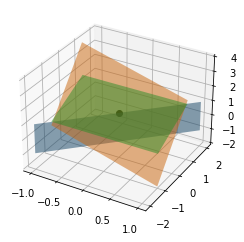

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



x = np.linspace(-1,1,10)
y = np.linspace(-1,1,10)
z = np.linspace(-1,1,10)

X1,Z1 = np.meshgrid(x,z)
Y1 = (0 - 2*X1 - 0*Z1) / -1

X2,Y2 = np.meshgrid(x,y)
Z2 = (-1 - -1*X2 - 2*Y2) /-1

X3,Y3 = np.meshgrid(x,y)
Z3 = (4 - 0*X3 - -3*Y3) / 4

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X1, Y1, Z1, alpha=0.5, rstride=100, cstride=100)
surf = ax.plot_surface(X2, Y2, Z2, alpha=0.5, rstride=100, cstride=100)
surf = ax.plot_surface(X3, Y3, Z3, alpha=0.5, rstride=100, cstride=100)

#ax.plot((1,1),(-8,8),(-9,23), lw=2, c='b')
#ax.plot_surface(X3,Y3,Z3, alpha=0.5, facecolors='g', rstride=100, cstride=100)
ax.plot((0,),(0,),(1,), lw=2, c='k', marker='o')

plt.show()

Given how long that took me and the resulting graph it is not really worth it to do this either by hand or when working with even higher dimensional planes.<br>
The Row picture quickly becomes to complex to plot.

#### The 3D Column Picture
Shown below in algebraic format is the 3 dimensional row picture which agains gives us a simple look at the combinations of columns of a matrix `A` resulting in some right hand side `b`.<br>

$$ 
x\cdot \begin{bmatrix}
2 \\
-1 \\
0
\end{bmatrix}+y\cdot \begin{bmatrix}
1 \\
2 \\
-3
\end{bmatrix}+z\cdot \begin{bmatrix}
0 \\
-1 \\
4
\end{bmatrix}=\begin{bmatrix}
0 \\
-1 \\
4
\end{bmatrix}
$$


The plotting of the 3 vectors in 3D space is easier to do by hand but will not always be so simple and will not always have such a simple solution as we can see here:

![title](LA_images/3dRowPic.png)

The row picture above shows us that to get to the desired `b` of `[0,-1,4]`, we need only take `1` of `z`. Giving us an answer `X = [0,0,1]`.

For the majority of possible right hand sides in systems of equations, it is unlikely that is will be as simple. Which makes the row pic similarly difficult to plot and use with 3D or higher.

Looking again at the `big picture` of Linear Algebra where we want to know if out system of equations can solve `Ax = b` for all `b's`.<br>
If we change our b to be `[1,1,-3]` then our solution `X` we could observe to be a combination of `col.1 + col.2`.<br>
This is not really evident from our Col. picture however so we need to use matrix elimination for this and all `b's` that we might come across, answering the fundamental algebra question for Linear Algebra.

In other words we want to know:
$$ Do\ the\ linear\ combinations\ of\ the\ columns\ of\ A\ fill\ the\ N\ dimensional\ space\ of\ our\ N\ Unknowns?$$

In the Col picture what is really happening is `A*x` Where `A` is a matrix, `x` is a vector and the result `b` is a combination of the columns of A.
Linear combinations to find all possible `b's` is possible with the example Matrix and so we can say that the matrix `A` is:<br>
- Non-Singular 
- Invertible

So When would a 3×3 A not produce some `b` in the 3 dimensional plane?
When 1 or more cols of A are dependent. When they `share a plane`.<br>
If `col.3 = col.1 + col.2`. Then `col.3` wouldn't give us anything new, our solutions would exist only on a plane in R3, not the entire space.<br>
This Matrix would be:<br>
- Singular
- Not Invertable.

#### Thinking in 9 Dimensional Space

Imagine a `Vector 'v'` with `9 components` therefore `9 unknowns`.<br>
We have 9 equations, which when taken in a Matrix form give us 9 column vectors each one would be a `vector` in 9D space.<br>
We are be looking at their `linear combinations` and the possible right hand side `b's` we can produce and asking can we get a combination where we multiply the matrix of equations `A` by a combination or <b>solution</b> vector `x` to produce all possible `b's`.<br>
Essentially: <i>Can we always get a solution?</i><br>
It depends on our matrix, we could have columns that are not independent if the 8th is equal to the 9th then no.

## Lecture 2:

### Overview:

Main topics:
- Systems of Equations
    - How to Solve systems of equations
- Elimination
    - How software solves equations.
    - When will we have a success or failure of elimination
- Back-Substitution
    - Back substitution involves solving for a single unknown first and `substituting` that unknown to discover the remaining unknowns.
- Elimination Matrices
    -  The expression of Elimination in `Matrix language` as opposed to multiple individual algebraic operations.
    - A look at how we multiply matrices and why

### Elimination

`Elimination` is a method used by software packages to solve systems of `Systems of Linear Equations`.<br>
When elimination <i>succeeds</i> it gets an answer `(solution)` that solves the system.<br>
The Questions we should be asking then is does this method often <i>succeed</i>?
<br><br>
<b>Normally</b> it does.<br>
If the matrix `A` is a `good` matrix then we are likely to be able to solve the system.<br>


### Good Matrices:

Good matrices are those that have independent columns in `A` with enough equations to solve for our unknowns.

### Example System

The below system of 3 equations has `3 unknowns`: `x, y, z`.

$$ \begin{align} {x}+{2y}+{z} &= {2} 
\\ {3x}+{8y}+{z} &= {12}
\\ {4y}+{z} &= {2} 
\end{align} $$
<br>

This is above the system `Ax = b`. This is the system we are trying to solve for our `b`.

<br>

This system can be expressed in the matrix `A` below:
<br>

$$ \begin{align}
{\begin{bmatrix}
1 & 2 & 1 \\
3 & 8 & 1 \\
0 & 4 & 1
\end{bmatrix}}
\end{align}$$

So what does elimation do? What will the process of elimination do to the set of equations that we are trying to solve?

<i>We multiply the first equation by the right number and subtract it from the seconds equation</i><br>
Why?<br>
<b>We want to remove `x` from the second equation.</b><br>
These equations are all straight lines for any `b` (other than the zero vector then they are a point). If we multiply all co-efficients and result of a line by any scalar the values of the co-efficient remain the same.<br>
Quick example: let `y=1, x=2`

$$ \begin{align} {2x}-{y} &= {3} 
\\ {4x} - {2y} &= {6} \end{align} $$

$$ \begin{align} {2(2)}-{1(1)} &= {3} 
\\ {4(2)} - {2(1)} &= {6} \end{align} $$

So, we can safely multiply the values by scalars, this is one of our `Linear Operations`.
Other linear operations that do not affect our equations are `Addition`, `Subtraction` and `Division`.

So what is all of this useful for?<br>
We re able to multiply the first equation in our system by 3 to get.<br>
$$ \begin{align} {3x}+{6y}+{3z} &= {6} \end{align} $$

We now have the same number of `x's` in equation 1 as we do in equation 2.<br>
Subtracting eq.1 from eq.2 we get:

$$ \begin{align} {3x}+{8y}+{z} &= {12} - \\
{3x}+{6y}+{3z} &= {6}\\
={0x}+{2y}-{2z} &= {6} \end{align} $$


We used the 1st `x` value in the 1st row to remove